# Install dependencies - deepfake, dlib

In [1]:
!pip install --quiet deepface dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.5 MB/s eta 0:00:00


In [2]:
# necessary imports
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deepface import DeepFace
import pprint

24-08-22 03:36:43 - Directory /root/.deepface has been created
24-08-22 03:36:43 - Directory /root/.deepface/weights has been created


# Create functions to display image and create bounding boxes with labels

In [3]:
# Function to plot images
def showImage(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# function to print the deepface.analyze results on the image
def faceAttributeBox(img_path, obj):
  image = cv2.imread(img_path)
  obj = obj[0]
  x = obj['region']['x']
  y = obj['region']['y']
  h = obj['region']['h']
  w = obj['region']['w']
  age = obj['age']
  gender = obj['dominant_gender']
  gender = 'F' if gender == 'Woman' else 'M'
  dominant_emotion = obj['dominant_emotion']
  dominant_race = obj['dominant_race']
  dominant_emotion = obj['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  showImage("Face Analysis", image)

# Run the images

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

24-08-22 03:36:45 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:13, 40.2MB/s]
  4%|▍         | 21.5M/539M [00:00<00:12, 40.7MB/s]
  6%|▌         | 32.0M/539M [00:00<00:12, 40.9MB/s]
  8%|▊         | 42.5M/539M [00:01<00:12, 40.6MB/s]
 10%|▉         | 53.0M/539M [00:01<00:11, 40.5MB/s]
 12%|█▏        | 63.4M/539M [00:01<00:11, 39.8MB/s]
 14%|█▎        | 73.9M/539M [00:01<00:11, 40.1MB/s]
 16%|█▌        | 84.4M/539M [00:02<00:11, 40.6MB/s]
 18%|█▊        | 94.9M/539M [00:02<00:11, 39.7MB/s]
 20%|█▉        | 105M/539M [00:02<00:10, 40.3MB/s] 
 22%|██▏       | 116M/539M [00:02<00:10, 40.9MB/s]
 23%|██▎       | 126M/539M [00:03<00:10, 40.9MB/s]
 25%|██▌       | 137M/539M [00:03<00:09, 41.4MB/s]
 27%|██▋       | 147M/539M [00:03<00:09, 42.0MB/s]
 29%|██▉       | 158M/539M [00:03<00:09, 40.6MB/s]
 31%|███       | 168M/5

24-08-22 03:37:07 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:12, 41.7MB/s]
  4%|▎         | 19.9M/537M [00:00<00:09, 56.3MB/s]
  5%|▍         | 26.7M/537M [00:00<00:10, 48.4MB/s]
  6%|▌         | 32.5M/537M [00:00<00:13, 36.4MB/s]
  8%|▊         | 42.5M/537M [00:01<00:13, 37.1MB/s]
 10%|▉         | 53.0M/537M [00:01<00:12, 38.5MB/s]
 12%|█▏        | 63.4M/537M [00:01<00:12, 37.9MB/s]
 14%|█▍        | 73.9M/537M [00:01<00:12, 38.4MB/s]
 16%|█▌        | 84.4M/537M [00:02<00:11, 39.5MB/s]
 18%|█▊        | 94.9M/537M [00:02<00:11, 39.3MB/s]
 20%|█▉        | 105M/537M [00:02<00:10, 39.8MB/s] 
 22%|██▏       | 116M/537M [00:02<00:10, 40.3MB/s]
 24%|██▎       | 126M/537M [00:03<00:10, 40.6MB/s]
 25%|██▌       | 137M/537M [00:03<00:09, 41.1MB/s]
 27%|██▋       | 147M/537M [00:03<00:09, 40.3MB/s]
 29%|██▉       |

24-08-22 03:37:23 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:12, 42.5MB/s]
  4%|▍         | 21.5M/537M [00:00<00:12, 42.6MB/s]
  6%|▌         | 32.0M/537M [00:00<00:12, 40.9MB/s]
  8%|▊         | 42.5M/537M [00:01<00:12, 41.1MB/s]
 10%|▉         | 53.0M/537M [00:01<00:12, 39.2MB/s]
 12%|█▏        | 63.4M/537M [00:01<00:11, 39.7MB/s]
 14%|█▍        | 73.9M/537M [00:01<00:11, 40.5MB/s]
 16%|█▌        | 84.4M/537M [00:02<00:11, 40.2MB/s]
 18%|█▊        | 94.9M/537M [00:02<00:10, 40.2MB/s]
 20%|█▉        | 105M/537M [00:02<00:10, 39.3MB/s] 
 22%|██▏       | 116M/537M [00:03<00:13, 31.3MB/s]
 24%|██▎       | 126M/537M [00:03<00:13, 31.3MB/s]
 25%|██▌       | 137M/537M [00:03<00:11, 33.4MB/s]
 27%|██▋       | 147M/537M [00:03<00:11, 35.3MB/s]
 29%|██▉       | 158M/537M [00:04<00:10, 35.9MB/s]
 31%|███▏  

24-08-22 03:37:40 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 216MB/s]
Action: emotion: 100%|██████████| 4/4 [00:57<00:00, 14.33s/it]


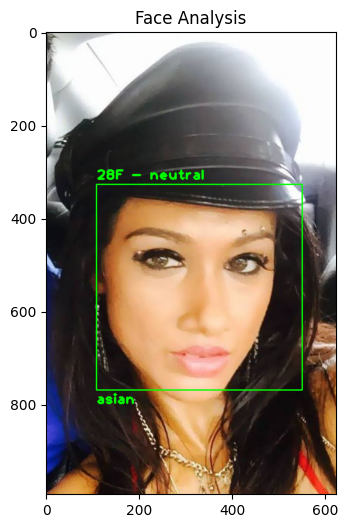

[   {   'age': 28,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Woman',
        'dominant_race': 'asian',
        'emotion': {   'angry': 0.05082590808426786,
                       'disgust': 1.0579316942452569e-07,
                       'fear': 0.3730433982562064,
                       'happy': 1.2745315037388505,
                       'neutral': 98.1579123829551,
                       'sad': 0.14368388494082598,
                       'surprise': 5.051841912816154e-06},
        'face_confidence': 0.93,
        'gender': {'Man': 0.11021306272596121, 'Woman': 99.88977909088135},
        'race': {   'asian': 45.75916230678558,
                    'black': 1.6397040337324142,
                    'indian': 3.567599505186081,
                    'latino hispanic': 22.153399884700775,
                    'middle eastern': 4.473699629306793,
                    'white': 22.40644246339798},
        'region': {   'h': 442,
                      'left_eye': (424, 496)

In [4]:
img_path = "/content/sample1.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 46.06it/s]


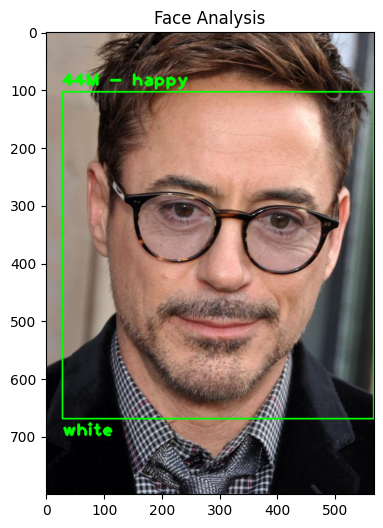

[   {   'age': 44,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Man',
        'dominant_race': 'white',
        'emotion': {   'angry': 5.489500736994087e-07,
                       'disgust': 2.383910918339121e-18,
                       'fear': 6.414259783719068e-09,
                       'happy': 99.99285340266546,
                       'neutral': 0.007148121647750759,
                       'sad': 1.4222694093096816e-06,
                       'surprise': 8.000382084058224e-10},
        'face_confidence': 0.9,
        'gender': {'Man': 99.97020363807678, 'Woman': 0.029798888135701418},
        'race': {   'asian': 2.8199484571814537,
                    'black': 2.8845274820923805,
                    'indian': 8.59571248292923,
                    'latino hispanic': 26.713502407073975,
                    'middle eastern': 26.21045708656311,
                    'white': 32.77585506439209},
        'region': {   'h': 566,
                      'left_eye': (395

In [5]:
img_path = "/content/Robert_Downey_Jr_avp_Iron_Man_3_Paris.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 32.47it/s]


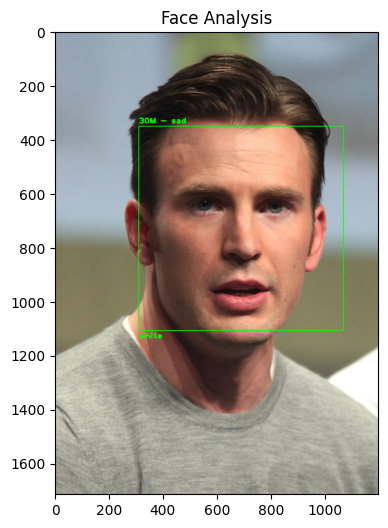

[   {   'age': 30,
        'dominant_emotion': 'sad',
        'dominant_gender': 'Man',
        'dominant_race': 'white',
        'emotion': {   'angry': 1.949918083846569,
                       'disgust': 7.527165735154995e-05,
                       'fear': 0.6179040297865868,
                       'happy': 0.46236547641456127,
                       'neutral': 35.10735332965851,
                       'sad': 61.77564859390259,
                       'surprise': 0.08673950796946883},
        'face_confidence': 0.9,
        'gender': {'Man': 99.97451901435852, 'Woman': 0.02547962067183107},
        'race': {   'asian': 2.6763455270697525e-06,
                    'black': 1.249417754897847e-07,
                    'indian': 4.108704732646468e-06,
                    'latino hispanic': 0.030664362211263906,
                    'middle eastern': 0.06376724721035344,
                    'white': 99.90556239518895},
        'region': {   'h': 758,
                      'left_eye': None,


In [6]:
img_path = "/content/Chris_Evans_SDCC_2014.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 20.43it/s]


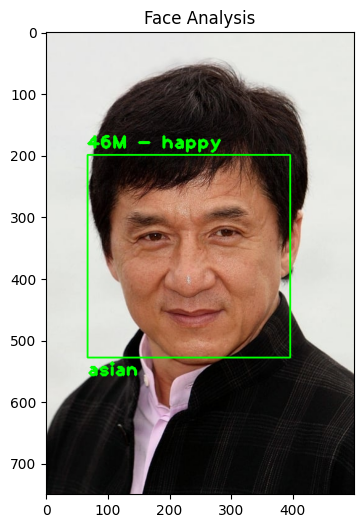

[   {   'age': 46,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Man',
        'dominant_race': 'asian',
        'emotion': {   'angry': 0.0269215935337953,
                       'disgust': 3.203115310692492e-06,
                       'fear': 0.0007431212428877075,
                       'happy': 86.88486658154328,
                       'neutral': 12.785536084835062,
                       'sad': 0.29979435575537156,
                       'surprise': 0.0021316410124185958},
        'face_confidence': 0.93,
        'gender': {'Man': 99.99164342880249, 'Woman': 0.008351594442501664},
        'race': {   'asian': 98.06849348953328,
                    'black': 0.012676127544857713,
                    'indian': 0.18441809742037044,
                    'latino hispanic': 1.3669187086474126,
                    'middle eastern': 0.005205110520475612,
                    'white': 0.362289997922778},
        'region': {   'h': 329,
                      'left_eye': (290

In [7]:
img_path = "/content/JackieChan.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 31.78it/s]


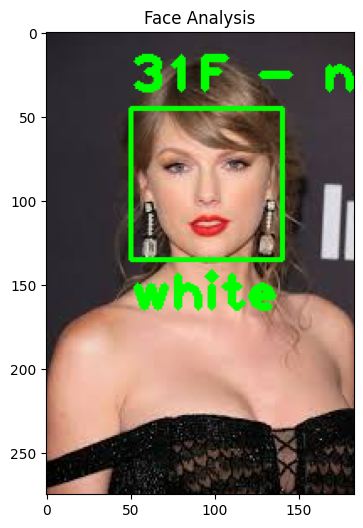

[   {   'age': 31,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Woman',
        'dominant_race': 'white',
        'emotion': {   'angry': 20.86792141199112,
                       'disgust': 0.08126695756800473,
                       'fear': 3.554196283221245,
                       'happy': 3.2715026289224625,
                       'neutral': 53.581082820892334,
                       'sad': 17.967872321605682,
                       'surprise': 0.6761565804481506},
        'face_confidence': 0.96,
        'gender': {'Man': 1.2799860371615068e-05, 'Woman': 99.99998807907104},
        'race': {   'asian': 3.1362152966578263e-13,
                    'black': 3.77942570037629e-18,
                    'indian': 2.196549264574799e-14,
                    'latino hispanic': 1.654327874689443e-06,
                    'middle eastern': 1.5302163092201226e-06,
                    'white': 100.0},
        'region': {   'h': 90,
                      'left_eye': None,
   

In [8]:
img_path = "/content/TaylorSwift.jpeg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


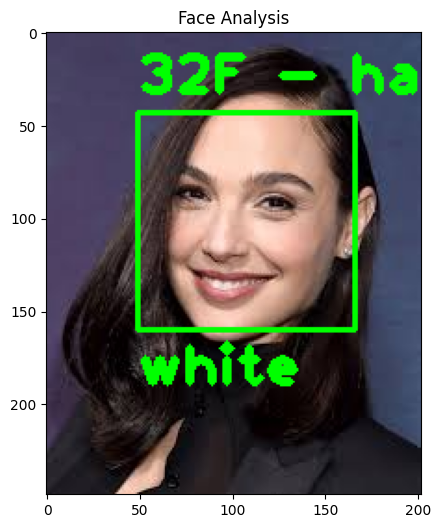

[   {   'age': 32,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Woman',
        'dominant_race': 'white',
        'emotion': {   'angry': 2.3562466396060833e-15,
                       'disgust': 1.2345751066723225e-22,
                       'fear': 3.89461447808342e-16,
                       'happy': 100.0,
                       'neutral': 5.204643116485386e-06,
                       'sad': 8.544946298932529e-13,
                       'surprise': 3.1591391422324325e-12},
        'face_confidence': 0.93,
        'gender': {'Man': 0.035573370405472815, 'Woman': 99.96442794799805},
        'race': {   'asian': 0.05340488278307021,
                    'black': 0.003656887201941572,
                    'indian': 0.05835461197420955,
                    'latino hispanic': 3.9444930851459503,
                    'middle eastern': 6.467186659574509,
                    'white': 89.47290182113647},
        'region': {   'h': 117,
                      'left_eye': (122,

In [9]:
img_path = "/content/galGadot.jpeg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 28.29it/s]


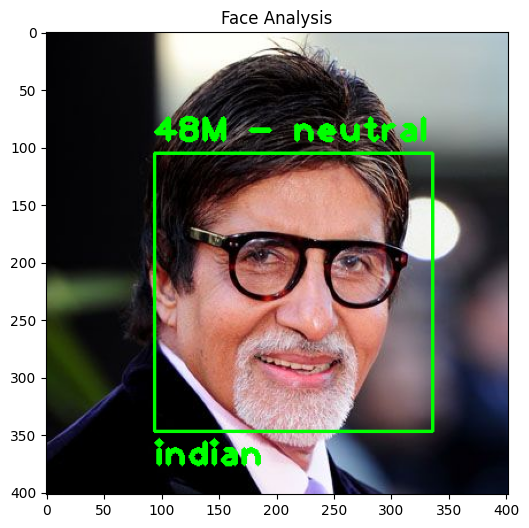

[   {   'age': 48,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 0.0009869333553069737,
                       'disgust': 2.6462638055160348e-14,
                       'fear': 7.240897161864268e-05,
                       'happy': 0.0007225359695439693,
                       'neutral': 99.99704360961914,
                       'sad': 0.0011772302059398498,
                       'surprise': 9.691982771897756e-08},
        'face_confidence': 0.96,
        'gender': {'Man': 96.78479433059692, 'Woman': 3.2152127474546432},
        'race': {   'asian': 9.058909118175507,
                    'black': 2.7967680245637894,
                    'indian': 29.855531454086304,
                    'latino hispanic': 25.169283151626587,
                    'middle eastern': 20.28845101594925,
                    'white': 12.831054627895355},
        'region': {   'h': 242,
                      'left_eye':

In [10]:
img_path = "/content/amithab.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 14.89it/s]


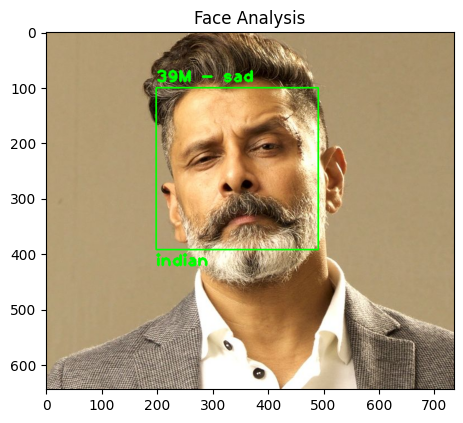

[   {   'age': 39,
        'dominant_emotion': 'sad',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 0.7929057814180851,
                       'disgust': 0.004651379640563391,
                       'fear': 25.15397071838379,
                       'happy': 6.713596731424332,
                       'neutral': 32.987576723098755,
                       'sad': 34.28110480308533,
                       'surprise': 0.0661933096125722},
        'face_confidence': 0.9,
        'gender': {'Man': 99.99091625213623, 'Woman': 0.009083037002710626},
        'race': {   'asian': 2.270814878247395,
                    'black': 4.256385429932424,
                    'indian': 69.07198201751923,
                    'latino hispanic': 18.078485956372504,
                    'middle eastern': 3.8428633549376303,
                    'white': 2.4794625887915385},
        'region': {   'h': 292,
                      'left_eye': (388, 208),
          

In [11]:
img_path = "/content/Vikram.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
faceAttributeBox(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)